In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
plt.rcParams['font.size'] = 20 #固定字体大小
plt.rcParams['figure.figsize'] = (14, 6) #固定图像大小
plt.rcParams['font.sans-serif']=['SimSun'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
# 数据读入
train = pd.read_csv('Xian_house_price_2022.6_train.csv')
test = pd.read_csv('Xian_house_price_2022.6_evaluation.csv')

In [3]:
# 删去没有用的列
tmp = train.pop('name')
tmp = test.pop('name')
tmp = train.pop('city_name')
tmp = test.pop('city_name')
# 取出label
train_y = train.pop('6_price')
test_y = test.pop('6_price')

In [4]:
train_y.describe()

count      239.000000
mean     16090.903766
std       4473.773474
min       7142.000000
25%      13570.500000
50%      15347.000000
75%      17655.500000
max      42113.000000
Name: 6_price, dtype: float64

In [5]:
# 对label做标准化缩放操作，即先做平移，再除标准差，逆变换则反过来操作即可.
# 这样标准化后预测效果更佳
loc = train_y.mean()
scale = train_y.std()
def modify(df, f=1):
    if f == 1:
        df -= loc
        df /= scale
    else:
        df *= scale
        df += loc
modify(train_y)
modify(test_y)

In [6]:
train.dtypes

size        float64
metro       float64
bus         float64
school      float64
hospital    float64
shop        float64
city          int64
year        float64
dtype: object

In [7]:
# 创建特征列
feature = []
for col in train.columns:
    feature.append(tf.feature_column.numeric_column(col))
feature

[NumericColumn(key='size', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='metro', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='bus', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='school', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='hospital', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='shop', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='city', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='year', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [8]:
# 构造input_fn
def input_fn(x, y=None, training=True, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices((dict(x), y))
    if training:
        ds = ds.shuffle(1000).repeat()
    return ds.batch(batch_size)

In [9]:
# 创建estimator
#est = tf.estimator.DNNRegressor([64, 32], feature)  # 深度神经网络模型
est = tf.estimator.LinearRegressor(feature)  # 线性回归
clear_output()

In [10]:
# 开始训练
est.train(lambda: input_fn(train, train_y), steps=50000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.


D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\yy\AppData\Local\Temp\tmp6qu1wwr4\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.59897923, step = 0
INFO:tensorflow:global_step/sec: 562.806
INFO:tensorflow:loss = 0.9071555, step = 100 (0.178 sec)
INFO:tensorflow:global_step/sec: 1162.8
INFO:tensorflow:loss = 0.45443922, step = 200 (0.087 sec)
INFO:tensorflow:global_step/sec: 1204.83
INFO:tensorflow:loss = 0.70550704, step = 300 (0.083 sec)
INFO:tensorflow:global_step/sec: 1041.68
INFO:tensorflow:loss = 0.70510995, step = 400 (0.

INFO:tensorflow:loss = 0.62152886, step = 7500 (0.078 sec)
INFO:tensorflow:global_step/sec: 1333.34
INFO:tensorflow:loss = 0.5879834, step = 7600 (0.075 sec)
INFO:tensorflow:global_step/sec: 1265.83
INFO:tensorflow:loss = 0.43609577, step = 7700 (0.079 sec)
INFO:tensorflow:global_step/sec: 1351.35
INFO:tensorflow:loss = 0.810173, step = 7800 (0.075 sec)
INFO:tensorflow:global_step/sec: 1333.33
INFO:tensorflow:loss = 0.48721582, step = 7900 (0.075 sec)
INFO:tensorflow:global_step/sec: 1250
INFO:tensorflow:loss = 0.52541375, step = 8000 (0.080 sec)
INFO:tensorflow:global_step/sec: 1204.82
INFO:tensorflow:loss = 1.4298676, step = 8100 (0.082 sec)
INFO:tensorflow:global_step/sec: 1204.8
INFO:tensorflow:loss = 0.9925258, step = 8200 (0.084 sec)
INFO:tensorflow:global_step/sec: 1250
INFO:tensorflow:loss = 0.71964395, step = 8300 (0.080 sec)
INFO:tensorflow:global_step/sec: 1234.58
INFO:tensorflow:loss = 0.71618724, step = 8400 (0.081 sec)
INFO:tensorflow:global_step/sec: 1136.38
INFO:tensorf

INFO:tensorflow:global_step/sec: 1219.49
INFO:tensorflow:loss = 0.9434416, step = 15800 (0.081 sec)
INFO:tensorflow:global_step/sec: 1219.62
INFO:tensorflow:loss = 0.5534173, step = 15900 (0.082 sec)
INFO:tensorflow:global_step/sec: 1265.06
INFO:tensorflow:loss = 1.015307, step = 16000 (0.079 sec)
INFO:tensorflow:global_step/sec: 1351.35
INFO:tensorflow:loss = 0.6278856, step = 16100 (0.074 sec)
INFO:tensorflow:global_step/sec: 1272.6
INFO:tensorflow:loss = 0.535624, step = 16200 (0.079 sec)
INFO:tensorflow:global_step/sec: 1234.62
INFO:tensorflow:loss = 0.79464436, step = 16300 (0.082 sec)
INFO:tensorflow:global_step/sec: 1219.51
INFO:tensorflow:loss = 0.45986074, step = 16400 (0.082 sec)
INFO:tensorflow:global_step/sec: 1250
INFO:tensorflow:loss = 1.8143411, step = 16500 (0.079 sec)
INFO:tensorflow:global_step/sec: 1075.23
INFO:tensorflow:loss = 0.55408645, step = 16600 (0.093 sec)
INFO:tensorflow:global_step/sec: 1234.61
INFO:tensorflow:loss = 0.70652926, step = 16700 (0.082 sec)
IN

INFO:tensorflow:global_step/sec: 1219.52
INFO:tensorflow:loss = 1.0606045, step = 24000 (0.082 sec)
INFO:tensorflow:global_step/sec: 1162.78
INFO:tensorflow:loss = 0.74934447, step = 24100 (0.086 sec)
INFO:tensorflow:global_step/sec: 1298.71
INFO:tensorflow:loss = 1.6433969, step = 24200 (0.076 sec)
INFO:tensorflow:global_step/sec: 1265.82
INFO:tensorflow:loss = 0.9497151, step = 24300 (0.080 sec)
INFO:tensorflow:global_step/sec: 1250.01
INFO:tensorflow:loss = 0.31148547, step = 24400 (0.080 sec)
INFO:tensorflow:global_step/sec: 1314.79
INFO:tensorflow:loss = 0.5677979, step = 24500 (0.075 sec)
INFO:tensorflow:global_step/sec: 1204.86
INFO:tensorflow:loss = 0.7282679, step = 24600 (0.084 sec)
INFO:tensorflow:global_step/sec: 1162.78
INFO:tensorflow:loss = 1.4646957, step = 24700 (0.085 sec)
INFO:tensorflow:global_step/sec: 1315.81
INFO:tensorflow:loss = 0.6604788, step = 24800 (0.077 sec)
INFO:tensorflow:global_step/sec: 1196.27
INFO:tensorflow:loss = 0.8957149, step = 24900 (0.083 sec

INFO:tensorflow:global_step/sec: 1333.32
INFO:tensorflow:loss = 0.5967325, step = 32200 (0.076 sec)
INFO:tensorflow:global_step/sec: 1265.84
INFO:tensorflow:loss = 0.42890045, step = 32300 (0.078 sec)
INFO:tensorflow:global_step/sec: 1296.21
INFO:tensorflow:loss = 0.92612696, step = 32400 (0.078 sec)
INFO:tensorflow:global_step/sec: 1219.39
INFO:tensorflow:loss = 0.73690355, step = 32500 (0.081 sec)
INFO:tensorflow:global_step/sec: 839.946
INFO:tensorflow:loss = 1.4122566, step = 32600 (0.120 sec)
INFO:tensorflow:global_step/sec: 1022.22
INFO:tensorflow:loss = 0.64075774, step = 32700 (0.098 sec)
INFO:tensorflow:global_step/sec: 1219.13
INFO:tensorflow:loss = 0.8315117, step = 32800 (0.081 sec)
INFO:tensorflow:global_step/sec: 1286.52
INFO:tensorflow:loss = 1.4633174, step = 32900 (0.078 sec)
INFO:tensorflow:global_step/sec: 1265.61
INFO:tensorflow:loss = 2.0166483, step = 33000 (0.080 sec)
INFO:tensorflow:global_step/sec: 1305.34
INFO:tensorflow:loss = 0.82153046, step = 33100 (0.077 

INFO:tensorflow:global_step/sec: 885.027
INFO:tensorflow:loss = 0.7810848, step = 40400 (0.112 sec)
INFO:tensorflow:global_step/sec: 934.595
INFO:tensorflow:loss = 0.8648754, step = 40500 (0.108 sec)
INFO:tensorflow:global_step/sec: 946.855
INFO:tensorflow:loss = 0.5259675, step = 40600 (0.105 sec)
INFO:tensorflow:global_step/sec: 1265.76
INFO:tensorflow:loss = 0.31019425, step = 40700 (0.080 sec)
INFO:tensorflow:global_step/sec: 1265.88
INFO:tensorflow:loss = 0.74761236, step = 40800 (0.079 sec)
INFO:tensorflow:global_step/sec: 1250.04
INFO:tensorflow:loss = 0.41853738, step = 40900 (0.080 sec)
INFO:tensorflow:global_step/sec: 1249.93
INFO:tensorflow:loss = 0.5468416, step = 41000 (0.080 sec)
INFO:tensorflow:global_step/sec: 1219.52
INFO:tensorflow:loss = 0.7176477, step = 41100 (0.081 sec)
INFO:tensorflow:global_step/sec: 1204.84
INFO:tensorflow:loss = 0.61052185, step = 41200 (0.084 sec)
INFO:tensorflow:global_step/sec: 1020.44
INFO:tensorflow:loss = 0.9755118, step = 41300 (0.097 s

INFO:tensorflow:global_step/sec: 1204.84
INFO:tensorflow:loss = 0.40037975, step = 48600 (0.082 sec)
INFO:tensorflow:global_step/sec: 1162.8
INFO:tensorflow:loss = 0.4238106, step = 48700 (0.087 sec)
INFO:tensorflow:global_step/sec: 1063.83
INFO:tensorflow:loss = 1.5948215, step = 48800 (0.094 sec)
INFO:tensorflow:global_step/sec: 1219.43
INFO:tensorflow:loss = 0.5198903, step = 48900 (0.081 sec)
INFO:tensorflow:global_step/sec: 1219.6
INFO:tensorflow:loss = 1.4812689, step = 49000 (0.083 sec)
INFO:tensorflow:global_step/sec: 1272.4
INFO:tensorflow:loss = 0.6479023, step = 49100 (0.079 sec)
INFO:tensorflow:global_step/sec: 1265.8
INFO:tensorflow:loss = 0.55523473, step = 49200 (0.079 sec)
INFO:tensorflow:global_step/sec: 1298.68
INFO:tensorflow:loss = 0.65507984, step = 49300 (0.076 sec)
INFO:tensorflow:global_step/sec: 1265.88
INFO:tensorflow:loss = 0.9123962, step = 49400 (0.080 sec)
INFO:tensorflow:global_step/sec: 1219.49
INFO:tensorflow:loss = 1.1671712, step = 49500 (0.081 sec)
I

In [11]:
# 评估模型
est.evaluate(lambda: input_fn(test, test_y, training=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-07-07T13:26:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\yy\AppData\Local\Temp\tmp6qu1wwr4\model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.28103s
INFO:tensorflow:Finished evaluation at 2022-07-07-13:26:55
INFO:tensorflow:Saving dict for global step 50000: average_loss = 0.65353763, global_step = 50000, label/mean = -0.11609264, loss = 0.64596915, prediction/mean = -0.012493565
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 50000: C:\Users\yy\AppData\Local\Temp\tmp6qu1wwr4\model.ckpt-50000


{'average_loss': 0.65353763,
 'label/mean': -0.11609264,
 'loss': 0.64596915,
 'prediction/mean': -0.012493565,
 'global_step': 50000}

In [12]:
# 查看预测结果
result = list(est.predict(lambda: input_fn(test, training=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\yy\AppData\Local\Temp\tmp6qu1wwr4\model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [13]:
# 将预测值存储为Numpy
predict = []
for dic in result:
    predict.append(dic['predictions'][0])
predict = np.array(predict)

           6_price
count    79.000000
mean     43.136456
std     851.158766
min    -587.920000
25%    -115.010000
50%     -70.980000
75%     -21.075000
max    7043.700000


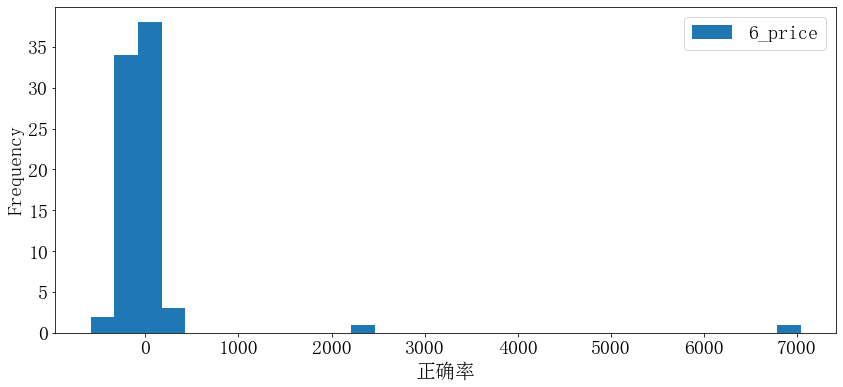

In [14]:
# 比较预测值和实际值的差距
def diff(pred, real):
    different = pd.DataFrame(np.round((predict - test_y) / test_y * 1e4) / 1e2)  # 计算差值占比
    print(different.describe())  # 输出均值与标准差
    different.plot.hist(bins=30)  # 绘图
    plt.xlabel('正确率')
    plt.show()

diff(predict, test_y)

         6_price
count  79.000000
mean    7.394684
std    22.822111
min   -42.530000
25%    -7.415000
50%     4.640000
75%    23.075000
max    74.430000


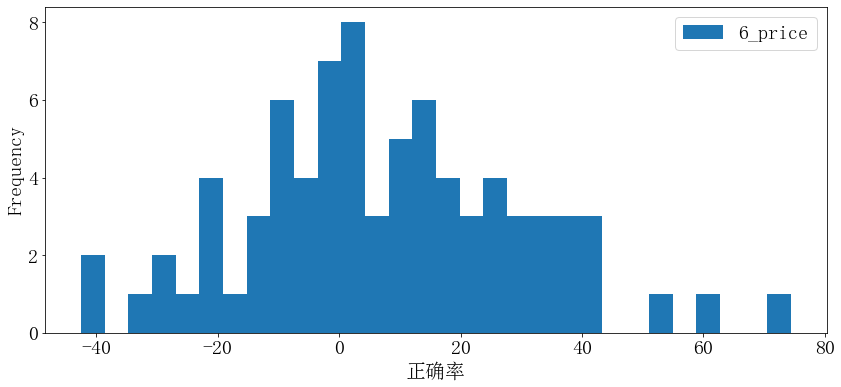

In [15]:
# 在转化为实际的价格
modify(predict, -1)
modify(test_y, -1)
diff(predict, test_y)